# Adaboost

In [10]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
def plot_decision_boundary(clf, X, y, alpha=0.1):
	axes = [-1.5, 2.4, -1, 1.5]

	x1, x2 = np.meshgrid(
		np.linspace(axes[0], axes[1], 100),
		np.linspace(axes[2], axes[3], 100)
	)
	X_new = np.c_[x1.ravel(), x2.ravel()]
	y_pred = clf.predict(X_new).reshape(x1.shape)

	plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='gist_rainbow_r')
	plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
	colors = ["#78705c", "#c47b27"]
	markers = ("o", "^")
	for idx in (0, 1):
		plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
				 color=colors[idx], marker=markers[idx], linestyle="none")
	plt.axis(axes)
	plt.xlabel(r"$x_1$")
	plt.ylabel(r"$x_2$", rotation=0)

Let's take a closer look at the ***AdaBoost*** algorithm. Each instance weight $w^{(i)}$ is initially set to $1/m$. A first predictor is trained, and its weighted error rate $r_1$ is computed on the training set

$$
r_j = \frac{
\sum_{i=1}^{m} w^{(i)} \cdot \mathbb{I}\left( \hat{y}_j^{(i)} \ne y^{(i)} \right)
}{
\sum_{i=1}^{m} w^{(i)}
}
\quad \text{where } \hat{y}_j^{(i)} \text{ is the } j^\text{th} \text{ predictor's prediction for the } i^\text{th} \text{ instance}.
$$

The predictor's weight $\alpha_{j}$ is then computed, where $\eta$ is the learning rate hyperparameter. The more accurate the predictor is, the higher its weight will be. If it's just guessing randomly, then its weight will be close to zero. However, if it most often wrong then its weight will be negative

$$
\alpha_{j} = \eta log(\frac{1-r_{j}}{r_{j}})
$$

Next, the ***AdaBoost*** algorithm updates the instance weights, which boosts the weights of the misclassified instances.

$$
\text{for } i = 1, 2, \dots, m \quad
w^{(i)} \leftarrow
\begin{cases}
w^{(i)} & \text{if } \hat{y}_j^{(i)} = y^{(i)} \\
w^{(i)} \exp(\alpha_j) & \text{if } \hat{y}_j^{(i)} \ne y^{(i)}
\end{cases}
$$

Finally, a new predictor is trained using the updated weights, and the whole process is repeated. The algorithm stops when the desired number of predictor is reached, or when a perfect predictor is found

To make predictions, ***AdaBoost*** simply computed the predictions of all the predictors and weights them using the predictor weights $\alpha_{j}$. The predicted class is the one that receives the majority of weighted votes

$$
\hat{y}(\mathbf{x}) = \arg\max_k \sum_{j=1}^{N} \alpha_j \, \mathbb{I}\left(\hat{y}_j(\mathbf{x}) = k\right)
$$


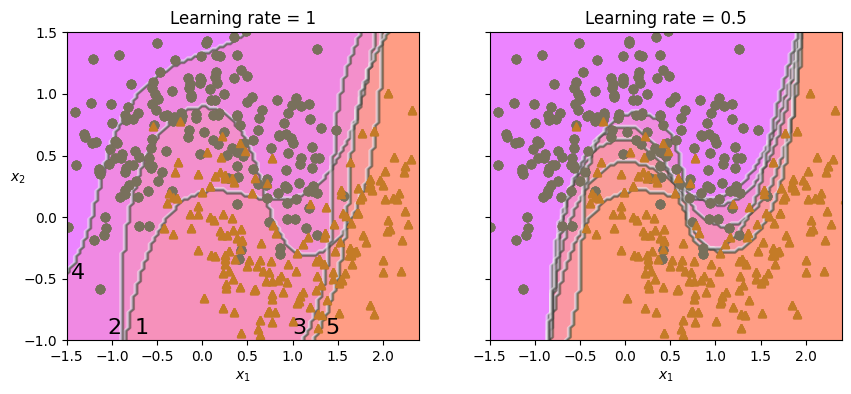

In [14]:
from sklearn.svm import SVC
import numpy as np

m = len(X_train)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, lr in ((0, 1), (1, 0.5)):
	sample_weights = np.ones(m) / m
	plt.sca(axes[subplot])

	for i in range(5):
		svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
		svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
		y_pred = svm_clf.predict(X_train)

		error_weight = sample_weights[y_pred != y_train].sum()
		r = error_weight / sample_weights.sum()
		alpha = lr * np.log((1 - r) / r)
		sample_weights[y_pred != y_train] *= np.exp(alpha)
		sample_weights /= sample_weights.sum()

		plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
		plt.title(f"Learning rate = {lr}")
	if subplot == 0:
		plt.text(-0.75, -0.95, "1", fontsize=16)
		plt.text(-1.05, -0.95, "2", fontsize=16)
		plt.text(1.0, -0.95, "3", fontsize=16)
		plt.text(-1.45, -0.5, "4", fontsize=16)
		plt.text(1.36, -0.95, "5", fontsize=16)
	else:
		plt.ylabel("")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
	DecisionTreeClassifier(max_depth=1), n_estimators=30,
	learning_rate=0.5, random_state=42
)
ada_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,30
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


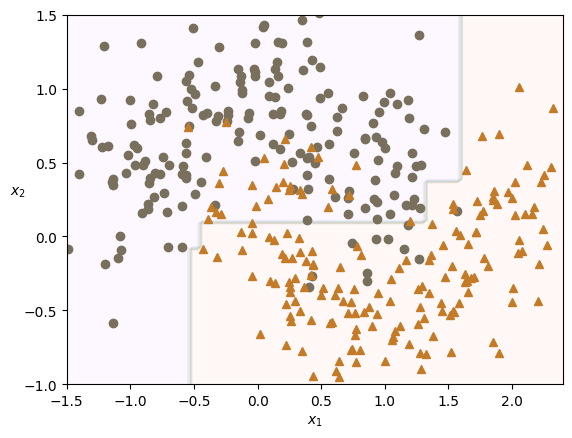

In [16]:
plot_decision_boundary(ada_clf,X_train,y_train)